<a href="https://colab.research.google.com/github/Abishethvarman/FakeNewsDetection/blob/CNN-RNN/2.1.5-FakeNewsDetector_RNN_LSTM_DS1%2B2E%2B20K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
import gensim

from nltk import download
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [ ]:
df_reliable = pd.read_csv("Reliable.csv")
df_fake = pd.read_csv("Fake.csv")

In [ ]:
df_reliable['isfake'] = 1

In [ ]:
df_fake['isfake'] = 0

In [ ]:
df_reliable_subset = df_reliable.head(20000)
df_fake_subset = df_fake.head(20000)

df = pd.concat([df_reliable_subset, df_fake_subset]).reset_index(drop=True)

In [ ]:
df.drop(columns = ['date'], inplace = True)

In [ ]:
df['original'] = df['title'] + ' ' + df['text']
df.head(3)

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...


In [ ]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
df.shape

(40000, 5)

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result


In [ ]:
# Apply the function to the dataframe
df['clean'] = df['original'].apply(preprocess)

In [ ]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [ ]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [ ]:
len(list_of_words)
total_words = len(list(set(list_of_words)))
total_words

101923

In [ ]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head(2)

,title,text,subject,isfake,original,clean,clean_joined
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t...","[budget, fight, looms, republicans, flip, fisc...",budget fight looms republicans flip fiscal scr...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...,"[military, accept, transgender, recruits, mond...",military accept transgender recruits monday pe...


In [ ]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

<Axes: xlabel='count', ylabel='subject'>

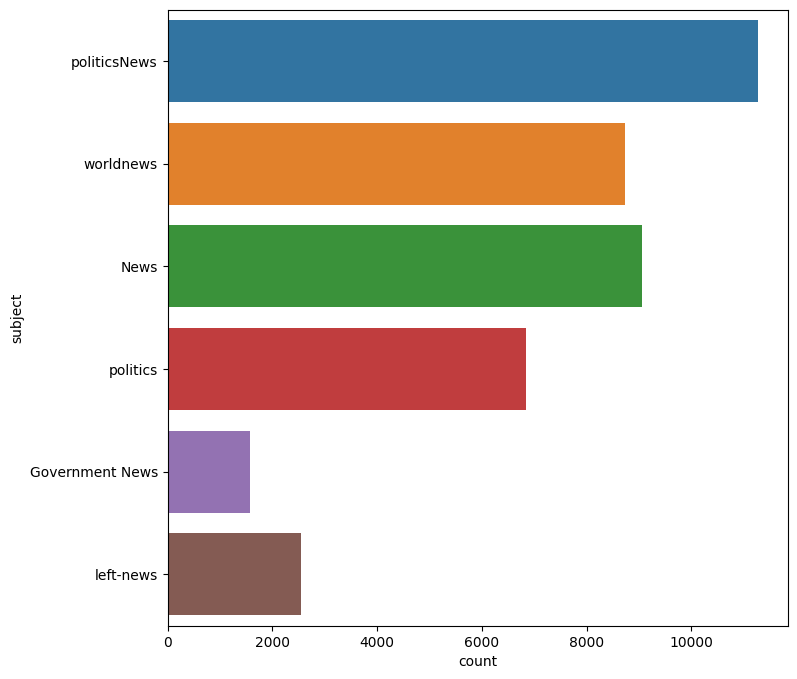

In [ ]:
# plot the number of samples in 'subject'
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [ ]:
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [ ]:
# split data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)
from nltk import word_tokenize

In [ ]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [ ]:
# Add padding can either be maxlen = 4406 or smaller number maxlen = 40 seems to work well based on results
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [  757   424  1874 11438   710  5540   463  1858  1662  5165   315     8
   757   795  3184    72   639   876  6345   463  4517 11438   710   217
  5540    22   529  4297  1662   468  1720  1903   315   493   876   150
   463  3057   915   710]
The padded encoding for document 2  is :  [   93    42  1086   145   617     1  1783    93     8    93    42    78
   550     4  3291     1  1783  2804     3     9     1   145   150   409
  3826 29712  5989  4680   213    33   257   275    68 39542     3  2175
  1250  2130  6566 17825]


In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         13046144  
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               263168    
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 13342337 (50.90 MB)
Trainable params: 13342337 (50.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
total_words

101923

In [ ]:
y_train = np.asarray(y_train)
# train the model
history = model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 2)

Epoch 1/2
400/400 [==============================] - 220s 540ms/step - loss: 0.0525 - acc: 0.9842 - val_loss: 0.0041 - val_acc: 0.9991
Epoch 2/2
400/400 [==============================] - 216s 541ms/step - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0055 - val_acc: 0.9989


In [ ]:
# make detection
detect = model.predict(padded_test)
# if the predicted value is >0.5 it is real else it is fake
detection = []
for i in range(len(detect)):
    if detect[i].item() > 0.0025:
        detection.append(1)
    else:
        detection.append(0)
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), detection)

print("Model Accuracy : ", accuracy)

250/250 [==============================] - 16s 63ms/step
Model Accuracy :  0.949875


In [ ]:
accuracy = accuracy_score(y_test, detection)
print("Model Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, detection)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, detection)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, detection)
print("F1 Score:", f1)

Model Accuracy: 0.949875
Precision: 0.9106182795698925
Recall: 0.9995082370297517
F1 Score: 0.9529949595592545


In [ ]:
# make detection
detect = model.predict(padded_test)
# if the predicted value is >0.5 it is real else it is fake
detection = []
for i in range(len(detect)):
    if detect[i].item() > 0.00001:
        detection.append(1)
    else:
        detection.append(0)
# getting the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), detection)

print("Model Accuracy : ", accuracy)
# Calculate Precision
precision = precision_score(y_test, detection)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, detection)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, detection)
print("F1 Score:", f1)

In [ ]:
# category dict
category = { 0: 'Fake News', 1 : "Reliable News"}

In [ ]:
cm = confusion_matrix(y_test, detection)

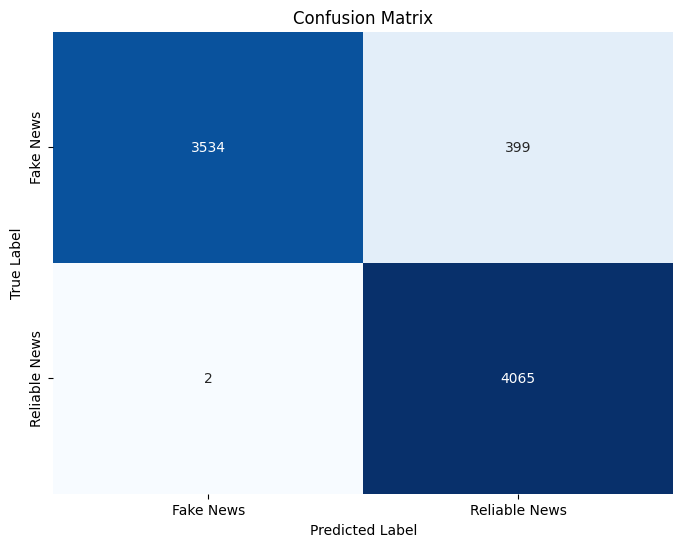

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fake News', 'Reliable News'],
            yticklabels=['Fake News', 'Reliable News'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

-------------------------------------

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


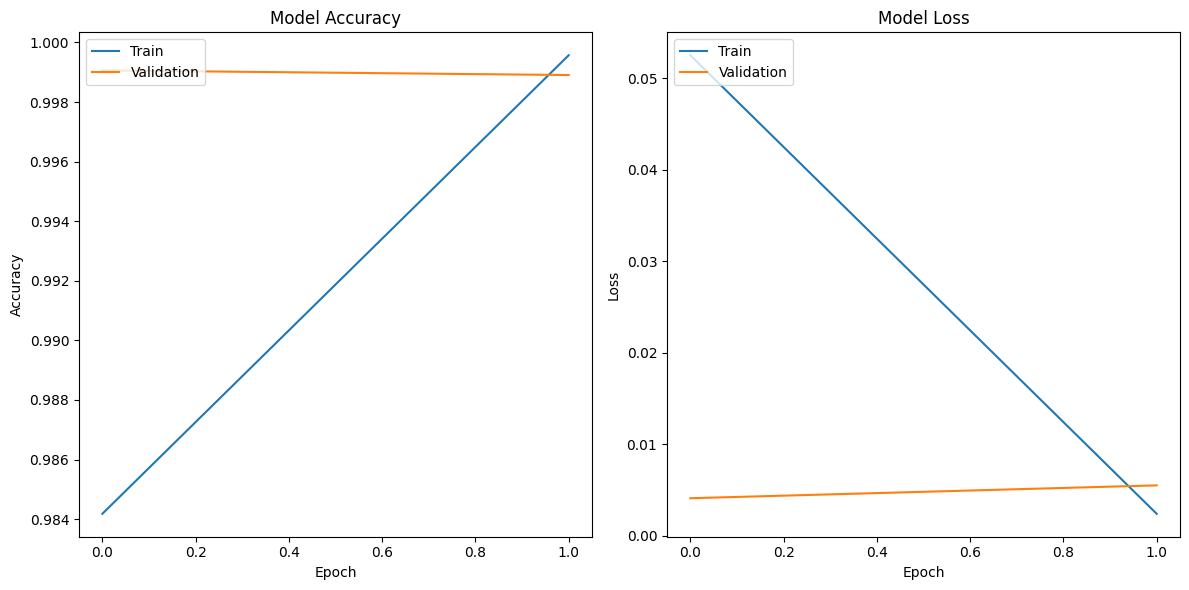

In [ ]:

def plot_history(history):
    print(history.history.keys())

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
    elif 'acc' in history.history:
        plt.plot(history.history['acc'])
    else:
        raise KeyError("No key found for accuracy in history")

    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'])
    elif 'val_acc' in history.history:
        plt.plot(history.history['val_acc'])
    else:
        raise KeyError("No key found for validation accuracy in history")

    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Display the training history plots
plot_history(history)


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


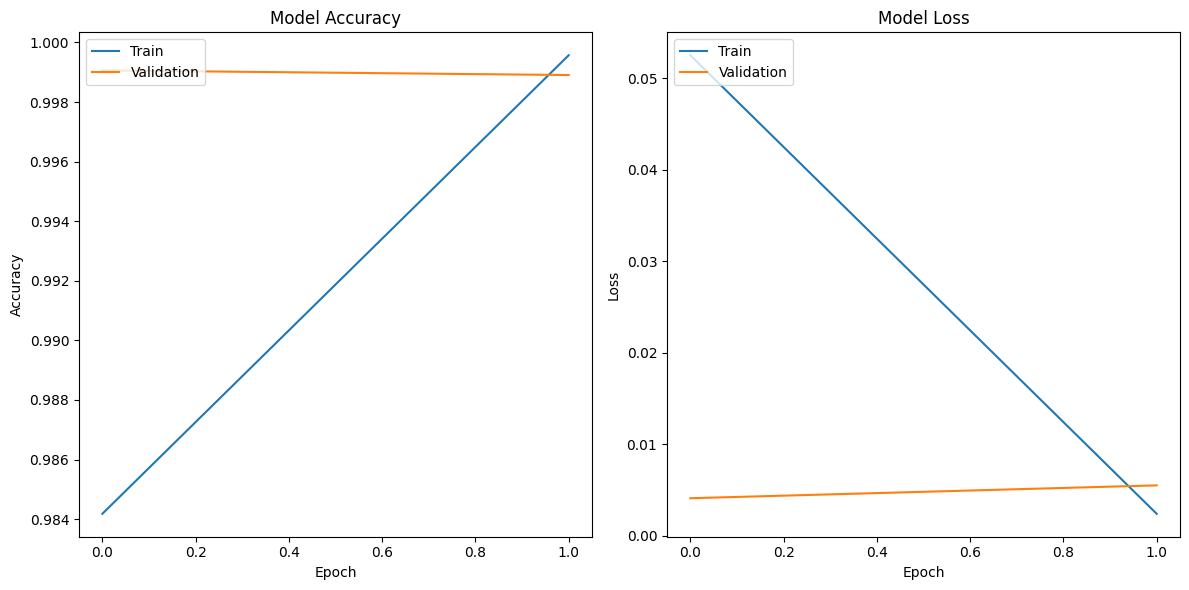

In [ ]:
def plot_history(history):
    # Check available keys in the history object
    print(history.history.keys())

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'])
    elif 'acc' in history.history:
        plt.plot(history.history['acc'])
    else:
        raise KeyError("No key found for accuracy in history")

    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'])
    elif 'val_acc' in history.history:
        plt.plot(history.history['val_acc'])
    else:
        raise KeyError("No key found for validation accuracy in history")

    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Display the training history plots
plot_history(history)
